# Практическая работа №2: Корреляционный и регрессионный анализ.
Выполнил студент группы 0373 Курилов Артём. Вариант 11.

## Цель работы
Освоение основных понятий, связанных с корреляционной зависимостью
между случайными величинами, статистическими гипотезами и проверкой их «справедливости». Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК
оценок, с понятием функции регрессии и роли МНК в регрессионном анализе, с корреляционным отношением, как мерой тесноты произвольной
(в том числе и линейной) корреляционной связи.

## Основные теоретические положения

МНК - основан на минимализации суммы квадратов отклонений некоторых функций от искомых переменных.

*Исправленное СКО*: $s=\sqrt{s^2}$

Функциональная зависимость - когда каждому значению одной переменной соответствует вполне опредлённое единственное значение другой.
Статистическая зависимость - при которой изменение одной из величин влечёт изменение распределения другого.
Корреляционная зависимость - статистическая зависимость, при которой изменение одной величины приводит к изменению среднего значения другой.

Доверительный интервал - интервал $(\theta^{*}-\delta;\theta^{*}+\delta)$, который покрывает неизвестный параметр $\theta$ с заданной надёжностью $\gamma$

Выборочное СКО: $\sigma_{B}=\sqrt{\sigma_{B}^{2}}$

Условные варианты - варианты, определяемые равенством $u_{i}=\frac{x_{i}-C}{h}$, где C - ложный нуль (середина вариационного ряда). Если вариационный ряд состоит из равноостоящих вариант с шагом h, то условные варианты $u_{i}\in\mathbb{Z}$

Выборочный коэффициент ассиметрии: $a_{s}^{*}=\frac{\mu_{3}^{8}}{\sigma_{B}^{3}}$

Выборочный коэффициент экцесса: $\varepsilon_{k}^{*}=\frac{\mu_{4}^{*}}{\sigma_{B}^{4}}-3$

Услвоное(группового) среднее - среднее арифмитическое тех значений случайной величины Х(Y), которые соотвествует значению случайной величины Y=y(X=x).

Преобразование Фишера:

$z=arth(r_{B}) $ 

$T_{nabl}=r_{B}\frac{\sqrt{n-2}}{\sqrt{1-r_{B}^{2}}}$

$T_{krit}=t(\alpha,df)$, где $df=n-2$

Теоретический коэффициент детерминации: 

$R_{y}^{2}=\frac{(\delta_{y}^{*})^{2}}{\sigma_{y}^{2}}, R_{x}^{2}=\frac{(\delta_{x}^{*})^{2}}{\sigma_{x}^{2}} $

Средняя квадратичная ошибка уравнения регрессии - среднее квадратичное отклонение наблюдаемых значений результативного признака от теоритических значений, рассчитанных по модели:

$S_{\varepsilon_{y}}=\sqrt{\frac{1}{n-l}\sum_{i=1}^{n}\varepsilon_{y_{i}}^{2}}, S_{\varepsilon_{x}}=\sqrt{\frac{1}{n-l}\sum_{i=1}^{n}\varepsilon_{x_{i}}^{2}}$, где l - количество параметров в модели регрессии

Средняя ошибка аппроксимации:

$A_{y}=\frac{1}{n}\sum_{i=1}^{n}|\frac{\varepsilon_{y_{i}}}{y_{i}}|, A_{x}=\frac{1}{n}\sum_{i=1}^{n}|\frac{\varepsilon_{x_{i}}}{x_{i}}|$

Выборочное корреляционное отношение Y к X - отношение межгруппового СКО к общему СКО признака Y: 

$\eta_{yx}=\frac{\sigma_{megr}}{\sigma_{ob}}$. Другое обозначение: $\eta_{yx}=\frac{\sigma_{\overline{y_{x}}}}{\sigma_{y}}$, где $\sigma_{\overline{y_{x}}}=\sqrt{\sigma_{mezhgr}^{2}}=\sqrt{\frac{(\sum{n_{x}(\overline{y_{x}}-\overline{y})^{2}})}{n}}, \sigma_{\overline{y}}=\sqrt{\sigma_{obsch}^{2}}=\sqrt{\frac{(\sum{n_{y}(\overline{y_{x}}-\overline{y})^{2}})}{n}}$

Условное (групповое) среднее - среднее арифметическое тех значений случайной величины X(Y), которые соответствуют значению случайной величины Y=y (X=x): 

$\overline{x_{y}}=\frac{\sum_{i=1}^{k_{x}}x_{i}n_{x_{i}y}}{\sum_{i=1}^{k_{x}}n_{x_{i}y}}, \overline{y_{x}}=\frac{\sum_{j=1}^{k_{y}}y_{j}n_{xy_{j}}}{\sum_{j=1}^{k_{y}}n_{xy_{j}}}$

Межгрупповое среднее:  

$\overline{xy}=\frac{1}{n}\sum_{i=1}^{k_{x}}\sum_{j=1}^{k_{y}}n_{x_{i}y_{j}}x_{i}y_{j}$

Уравнение регрессии : $\overline{y_{x}}-\overline{y}=r_{yx}\frac{\sigma_{y}}{\sigma_{x}}(x-\overline{x}), \overline{x_{y}}-\overline{x}=r_{xy}\frac{\sigma_{x}}{\sigma_{y}}(y-\overline{y})$

Метод наименьших квадратов: 

1) основан на минимизации суммы квадратов отклонений некоторых функций от искомых переменных

2) Минимизирующая функция: $F(a_{1}\cdots{a_{m}})=\sum_{i=1}^{n}(y_{i}-f(x_{i};a_{1}\cdots{a_{m}})^{2}\rightarrow{min}$

3) Необходимое условие экстремума функции многих переменных - равенство нулю всех частных производных функции F

Свойства корреляционного отношения:

1) $\eta\in[0,1] $

2) Если $\eta=0$, то признак Y с признаком X корреляционной зависимостью не связан (справедливо и обратное)

3) Если $\eta=1$, то признак Y связан с признаком X функциональной зависимостью (справедливо и обратное)

4) $\eta\geq|r_{B}| $

5) Если $\eta=r_{B}$, то имеет место быть точная линейная корреляционная зависимость

Доверительный интервал для оценки выборочного коэффициента корреляции:

$(th(z-\frac{t}{\sqrt{n-3}});th(z+\frac{t}{\sqrt{n-3}}))$, где t определяется как $\Phi(t)=\frac{\gamma}{2}$

Дисперсия результативного признака: 

$(\delta_{y}^{*})^{2}=\frac{1}{n}\sum_{i=1}^{n}(y_{x_{i}}-\overline{y})^{2}, (\delta_{x}^{*})^{2}=\frac{1}{n}\sum_{i=1}^{n}(x_{y_{i}}-\overline{x})^{2} $


## Постановка задачи
Из заданной генеральной совокупности сформировать выборку по второму признаку. Для системы двух случайных величин 𝑋 (первый признак) и 𝑌 (второй признак) сформировать двумерную выборку и найти
статистическую оценку коэффициента корреляции, построить доверительный интервал для коэффициента корреляции и осуществить проверку статистической гипотезы о равенстве коэффициента корреляции
нулю. Построить уравнения выборочных прямых среднеквадратической
регрессии. Полученные линейные функции регрессии отобразить графически. Найти выборочное корреляционное отношение. Оценить адекватность моделей. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы

### Используемые бибилиотеки:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable

### Выборка

In [ ]:
samplex = [63.05, 60.99, 56.54, 57.9, 53.57, 57.45, 57.53, 58.77, 56.34, 59.73, 60.95, 61.03, 64.02,
           64.72, 62.71, 64.67, 64.81, 67.99, 67.60, 68.7, 68.88, 70.83, 69.27, 68.72, 69.6, 70.77,
           72.05, 72.04, 71.9, 72.33, 72.25, 73.4, 72.72, 71.24, 73, 72.4, 73.8, 72.14, 69.78,
           72.15, 75.33, 75.29, 77.19, 76.15, 75.93, 78.51, 78.5, 75.88, 76.32, 76.89, 74.52, 74.12,
           75.84, 75.5, 76.86, 76.28, 78.68, 79.89, 80.58, 82.75, 82.4, 86.66, 82.26, 78.45, 78.76,
           77.98, 75.41, 72.42, 73.83, 74.952, 74.41, 73.45, 75.83, 79.5, 78.76, 79.41, 80.94, 82.12,
           80.34, 79.69, 83.04, 88.57, 88.62, 88.15, 88.41, 89.95, 88.67, 88.7, 88.58, 90.2, 91.24, 
           92.36, 91.62, 91.71, 89.22, 88.57, 88.59, 87.04]
sampley = [59.804, 55.857, 52.8, 53.005, 50.677, 54.3, 55.295, 56.907, 54.82, 56.547, 59.408, 59.38,
           62.02, 63.562, 60.486, 63.284, 63.45, 66.267, 65.55, 66.873, 67.764, 68.858, 66.42, 66.95, 
           68.674, 69.673, 70.606, 69.8, 70.9, 71.489, 70.3, 72.161, 70.1, 69.396, 71.569, 71.068, 72.262,
           71, 67.351, 70.491, 73.643, 74.282, 74.827, 74.175, 74.315, 75.18, 77.305, 74.42, 74.883, 74.611,
           73.283, 73.173, 74.082, 73.9, 75.4, 75.398, 77.198, 78.4, 79.104, 81.287, 81.516, 83.316, 77.381,
           76.803, 74.868, 76.592, 73.5, 70.327, 72.94, 73.961, 73.214, 71.8, 74.473, 78.16, 77.25, 76.4,
           78.581, 81.026, 79.139, 76.112, 80.801, 85.301, 87.018, 85.865, 87.28, 88.385, 87.307, 87.093, 86.384,
           88.622, 88.468, 91.133, 90.289, 88.391, 88, 87.497, 86.933, 84.95]

### Сортировка выборок

In [ ]:
samplex2 = [0] * 98
sampley2 = [0] * 98
for i in range(98):
    samplex2[i] = samplex[i]
for i in range(98):
    sampley2[i] = sampley[i]

In [ ]:
print("Ранжированный ряд для первой выборки:")
samplex = np.sort(samplex)
print(samplex)

Ранжированный ряд для первой выборки:
[53.57  56.34  56.54  57.45  57.53  57.9   58.77  59.73  60.95  60.99
 61.03  62.71  63.05  64.02  64.67  64.72  64.81  67.6   67.99  68.7
 68.72  68.88  69.27  69.6   69.78  70.77  70.83  71.24  71.9   72.04
 72.05  72.14  72.15  72.25  72.33  72.4   72.42  72.72  73.    73.4
 73.45  73.8   73.83  74.12  74.41  74.52  74.952 75.29  75.33  75.41
 75.5   75.83  75.84  75.88  75.93  76.15  76.28  76.32  76.86  76.89
 77.19  77.98  78.45  78.5   78.51  78.68  78.76  78.76  79.41  79.5
 79.69  79.89  80.34  80.58  80.94  82.12  82.26  82.4   82.75  83.04
 86.66  87.04  88.15  88.41  88.57  88.57  88.58  88.59  88.62  88.67
 88.7   89.22  89.95  90.2   91.24  91.62  91.71  92.36 ]


In [ ]:
print("Вариационный ряд для первой выборки:")
first, second=np.unique(samplex, return_counts=True)
var=np.column_stack((first, second)) 
print(var)

Вариационный ряд для первой выборки:
[[53.57   1.   ]
 [56.34   1.   ]
 [56.54   1.   ]
 [57.45   1.   ]
 [57.53   1.   ]
 [57.9    1.   ]
 [58.77   1.   ]
 [59.73   1.   ]
 [60.95   1.   ]
 [60.99   1.   ]
 [61.03   1.   ]
 [62.71   1.   ]
 [63.05   1.   ]
 [64.02   1.   ]
 [64.67   1.   ]
 [64.72   1.   ]
 [64.81   1.   ]
 [67.6    1.   ]
 [67.99   1.   ]
 [68.7    1.   ]
 [68.72   1.   ]
 [68.88   1.   ]
 [69.27   1.   ]
 [69.6    1.   ]
 [69.78   1.   ]
 [70.77   1.   ]
 [70.83   1.   ]
 [71.24   1.   ]
 [71.9    1.   ]
 [72.04   1.   ]
 [72.05   1.   ]
 [72.14   1.   ]
 [72.15   1.   ]
 [72.25   1.   ]
 [72.33   1.   ]
 [72.4    1.   ]
 [72.42   1.   ]
 [72.72   1.   ]
 [73.     1.   ]
 [73.4    1.   ]
 [73.45   1.   ]
 [73.8    1.   ]
 [73.83   1.   ]
 [74.12   1.   ]
 [74.41   1.   ]
 [74.52   1.   ]
 [74.952  1.   ]
 [75.29   1.   ]
 [75.33   1.   ]
 [75.41   1.   ]
 [75.5    1.   ]
 [75.83   1.   ]
 [75.84   1.   ]
 [75.88   1.   ]
 [75.93   1.   ]
 [76.15   1.   ]
 [76.28   1

In [ ]:
a1=samplex[len(samplex)-1]-samplex[0]
b1=math.ceil(1+math.log2(len(samplex)))
c1=a1/b1
d1=[0]*b1
e1=[0]*b1
d1[0]=samplex[0]
e1[0]=samplex[0]+c1
print("Интервальный ряд первой выборки:")
print("[",samplex[0],",",samplex[0]+c1,"]")
for i in range(1,b1):
    d1[i]= samplex[0]+c1*i
    e1[i]= samplex[0]+c1*(i+1)
    print("[",round(d1[i], 4),",",round(e1[i], 4),"]")

Интервальный ряд первой выборки:
[ 53.57 , 58.41875 ]
[ 58.4188 , 63.2675 ]
[ 63.2675 , 68.1163 ]
[ 68.1163 , 72.965 ]
[ 72.965 , 77.8138 ]
[ 77.8138 , 82.6625 ]
[ 82.6625 , 87.5112 ]
[ 87.5112 , 92.36 ]


In [ ]:
print("Ранжированный ряд для второй выборки:")
Me = np.sort(sampley)
sampley = np.sort(sampley)
print(sampley)

Ранжированный ряд для второй выборки:
[50.677 52.8   53.005 54.3   54.82  55.295 55.857 56.547 56.907 59.38
 59.408 59.804 60.486 62.02  63.284 63.45  63.562 65.55  66.267 66.42
 66.873 66.95  67.351 67.764 68.674 68.858 69.396 69.673 69.8   70.1
 70.3   70.327 70.491 70.606 70.9   71.    71.068 71.489 71.569 71.8
 72.161 72.262 72.94  73.173 73.214 73.283 73.5   73.643 73.9   73.961
 74.082 74.175 74.282 74.315 74.42  74.473 74.611 74.827 74.868 74.883
 75.18  75.398 75.4   76.112 76.4   76.592 76.803 77.198 77.25  77.305
 77.381 78.16  78.4   78.581 79.104 79.139 80.801 81.026 81.287 81.516
 83.316 84.95  85.301 85.865 86.384 86.933 87.018 87.093 87.28  87.307
 87.497 88.    88.385 88.391 88.468 88.622 90.289 91.133]


In [ ]:
print("Вариационный ряд для второй выборки:")
first1, second1=np.unique(sampley, return_counts=True)
var=np.column_stack((first1, second1)) 
print(var)

Вариационный ряд для второй выборки:
[[50.677  1.   ]
 [52.8    1.   ]
 [53.005  1.   ]
 [54.3    1.   ]
 [54.82   1.   ]
 [55.295  1.   ]
 [55.857  1.   ]
 [56.547  1.   ]
 [56.907  1.   ]
 [59.38   1.   ]
 [59.408  1.   ]
 [59.804  1.   ]
 [60.486  1.   ]
 [62.02   1.   ]
 [63.284  1.   ]
 [63.45   1.   ]
 [63.562  1.   ]
 [65.55   1.   ]
 [66.267  1.   ]
 [66.42   1.   ]
 [66.873  1.   ]
 [66.95   1.   ]
 [67.351  1.   ]
 [67.764  1.   ]
 [68.674  1.   ]
 [68.858  1.   ]
 [69.396  1.   ]
 [69.673  1.   ]
 [69.8    1.   ]
 [70.1    1.   ]
 [70.3    1.   ]
 [70.327  1.   ]
 [70.491  1.   ]
 [70.606  1.   ]
 [70.9    1.   ]
 [71.     1.   ]
 [71.068  1.   ]
 [71.489  1.   ]
 [71.569  1.   ]
 [71.8    1.   ]
 [72.161  1.   ]
 [72.262  1.   ]
 [72.94   1.   ]
 [73.173  1.   ]
 [73.214  1.   ]
 [73.283  1.   ]
 [73.5    1.   ]
 [73.643  1.   ]
 [73.9    1.   ]
 [73.961  1.   ]
 [74.082  1.   ]
 [74.175  1.   ]
 [74.282  1.   ]
 [74.315  1.   ]
 [74.42   1.   ]
 [74.473  1.   ]
 [74.611  1

In [ ]:
sampley = np.sort(sampley)
a=sampley[len(sampley)-1]-sampley[0]
b=math.ceil(1+math.log2(len(sampley)))
c=a/b
d=[0]*b
e=[0]*b
d[0]=sampley[0]
e[0]=sampley[0]+c
print("Интервальный ряд для второй выборки:")
print("[",sampley[0],",",sampley[0]+c,")")
for i in range(1,b):
    d[i]= sampley[0]+c*i
    e[i]= sampley[0]+c*(i+1)
    print("[",round(d[i], 4),",",round(e[i], 4),"]")
midx=[0]*b
for i in range(len(d)):
    midx[i]=(d[i]+e[i])/2

Интервальный ряд для второй выборки:
[ 50.677 , 55.734 )
[ 55.734 , 60.791 ]
[ 60.791 , 65.848 ]
[ 65.848 , 70.905 ]
[ 70.905 , 75.962 ]
[ 75.962 , 81.019 ]
[ 81.019 , 86.076 ]
[ 86.076 , 91.133 ]


## 1

In [ ]:
novitr=[0]*b
novitr2=[0]*b
novitr3 = 98
midy=[0]*b
novitr[0]=1
for i in range(len(d)):
    midy[i]=(d[i]+e[i])/2
    for j in range(len(sampley)):
        if (d[i]<sampley[j]<=e[i]):
            novitr[i]+=1
for i in range(len(d)):
    novitr2[i]=novitr[i]/len(sampley)
psum=[0]*b
nsum=[0]*b
table = PrettyTable(["№","[y(i-1);yi]","cpеднее","ni","p*i","сумма ni","сумма pi"])
nsum[0]=novitr[0]
psum[0]=novitr2[0]
for i in range(1,len(d)):
    psum[i]=psum[i-1]+novitr2[i]
    nsum[i]=nsum[i-1]+novitr[i]
table.add_row([1,[round(d[0],5),round(e[0],5)],round(midy[0],5),novitr[0],round(novitr2[0],5),nsum[0],round(psum[0],5)])
for i in range(1,len(d)):
    table.add_row([i+1,[round(d[i],5),round(e[i],5)],round(midy[i],5),novitr[i],round(novitr2[i],5),nsum[i],round(psum[i],5)])
table.add_row([" "," ","Cумма",novitr3,round(sum(novitr2))," "," "])
print(table)

+---+------------------+---------+----+---------+----------+----------+
| № |   [y(i-1);yi]    | cpеднее | ni |   p*i   | сумма ni | сумма pi |
+---+------------------+---------+----+---------+----------+----------+
| 1 | [50.677, 55.734] | 53.2055 | 6  | 0.06122 |    6     | 0.06122  |
| 2 | [55.734, 60.791] | 58.2625 | 7  | 0.07143 |    13    | 0.13265  |
| 3 | [60.791, 65.848] | 63.3195 | 5  | 0.05102 |    18    | 0.18367  |
| 4 | [65.848, 70.905] | 68.3765 | 17 | 0.17347 |    35    | 0.35714  |
| 5 | [70.905, 75.962] | 73.4335 | 28 | 0.28571 |    63    | 0.64286  |
| 6 | [75.962, 81.019] | 78.4905 | 14 | 0.14286 |    77    | 0.78571  |
| 7 | [81.019, 86.076] | 83.5475 | 7  | 0.07143 |    84    | 0.85714  |
| 8 | [86.076, 91.133] | 88.6045 | 14 | 0.14286 |    98    |   1.0    |
|   |                  |  Cумма  | 98 |    1    |          |          |
+---+------------------+---------+----+---------+----------+----------+


In [ ]:
table2 = PrettyTable(["Характеристика:","выб. среднее","дисперсия","ср. кв. откл.","S^2(y)","S(y)","a*(s)", "E*(k)", "Mода", "Mедиана", "V*, %"])
MOy = (sum(sampley)/novitr3)
Dy = 0
As = 0
E = 0
for i in range(98):
    Dy = Dy + (sampley[i] - MOy)**2
Dy = Dy/novitr3
S = Dy*novitr3/(novitr3-1)
M3 = 0
for i in range(novitr3):
    M3 = M3 + (sampley[i]-73.43)**3
M3 /= novitr3
As = M3/(math.sqrt(Dy))**3
M4 = 0
for i in range(novitr3):
    M4 = M4 + (sampley[i]-73.43)**4
M4 /= novitr3
E = M4/(math.sqrt(Dy))**4 - 3
Me = (Me[48] + Me[49])/2
V = (math.sqrt(Dy)/abs(MOy)) * 100
table2.add_row(["Значение:",round(MOy, 5), round(Dy, 5), round(math.sqrt(Dy), 5), round(S,5), round(math.sqrt(S), 5), round(As, 5), round(E, 5), "Моды нет", Me, round(V)])
print(table2)

+-----------------+--------------+-----------+---------------+----------+---------+----------+----------+----------+---------+-------+
| Характеристика: | выб. среднее | дисперсия | ср. кв. откл. |  S^2(y)  |   S(y)  |  a*(s)   |  E*(k)   |   Mода   | Mедиана | V*, % |
+-----------------+--------------+-----------+---------------+----------+---------+----------+----------+----------+---------+-------+
|    Значение:    |   73.29659   |  91.50879 |    9.56602    | 92.45218 | 9.61521 | -0.31238 | -0.31544 | Моды нет | 73.9305 |   13  |
+-----------------+--------------+-----------+---------------+----------+---------+----------+----------+----------+---------+-------+


Вывод:

Разница исправленной выборочной дисперсии и исправленного ско со смещёнными оценками дисперсии и ско незначительно мала(разница в сотые).

Коэффициент асимметрии меньше нуля, следовательно, левый хвост распределения длиннее правого.

Коэффициент эксцесса меньше нуля, следовательно, распределение не остроконечное.

Медиана находится в середине упорядоченной совокупности, мода отсутсвует, все элементы в выборке предоставлены в единичном экземпляре. 

Благодаря коэффициенту вариации можно судить о том, что совокупность достаточно однородная.

## 2

In [ ]:
o = [0] * 64
nx = [0] * 8
ny = [0] * 8
khelp = 0
for i in range(98):
    if samplex[i] < 55.734:
        o[0] += 1
    if samplex[i] > 55.7341 and samplex[i] < 60.791 and samplex[i] <= 58.41875:
        o[1] += 1
    if samplex[i] > 60.791 and samplex[i] < 65.848 and samplex[i] <= 58.41875:
        o[2] += 1
    if samplex[i] > 65.848 and samplex[i] < 70.905 and samplex[i] <= 58.41875:
        o[3] += 1
    if samplex[i] > 70.905 and samplex[i] < 75.962 and samplex[i] <= 58.41875:
        o[4] += 1
    if samplex[i] > 75.962 and samplex[i] < 81.019 and samplex[i] <= 58.41875:
        o[5] += 1
    if samplex[i] > 81.019 and samplex[i] < 86.076 and samplex[i] <= 58.41875:
        o[6] += 1
    if samplex[i] > 86.076 and samplex[i] <= 58.41875:
        o[7] += 1
for i in range(98):
    if samplex[i] < 55.734 and samplex[i] > 58.41875 and samplex[i] <= 63.2675:
        o[8] += 1
    if samplex[i] > 55.7341 and samplex[i] < 60.791 and samplex[i] > 58.41875 and samplex[i] <= 63.2675:
        o[9] += 1
    if samplex[i] > 60.791 and samplex[i] < 65.848 and samplex[i] > 58.41875 and samplex[i] <= 63.2675:
        o[10] += 1
    if samplex[i] > 65.848 and samplex[i] < 70.905 and samplex[i] > 58.41875 and samplex[i] <= 63.2675:
        o[11] += 1
    if samplex[i] > 70.905 and samplex[i] < 75.962 and samplex[i] > 58.41875 and samplex[i] <= 63.2675:
        o[12] += 1
    if samplex[i] > 75.962 and samplex[i] < 81.019 and samplex[i] > 58.41875 and samplex[i] <= 63.2675:
        o[13] += 1
    if samplex[i] > 81.019 and samplex[i] < 86.076 and samplex[i] > 58.41875 and samplex[i] <= 63.2675:
        o[14] += 1
    if samplex[i] > 86.076 and samplex[i] >= 58.41875 and samplex[i] <= 63.2675:
        o[15] += 1
for i in range(98):
    if samplex[i] < 55.734 and samplex[i] > 58.41875 and samplex[i] <= 63.2675:
        o[16] += 1
    if samplex[i] > 55.7341 and samplex[i] < 60.791 and samplex[i] >= 63.2675 and samplex[i] < 68.11625:
        o[17] += 1
    if samplex[i] > 60.791 and samplex[i] < 65.848 and samplex[i] < 68.11625 and samplex[i] >= 63.2675:
        o[18] += 1
    if samplex[i] > 65.848 and samplex[i] < 70.905 and samplex[i] < 68.11625 and samplex[i] >= 63.2675:
        o[19] += 1
    if samplex[i] > 70.905 and samplex[i] < 75.962 and samplex[i] < 68.11625 and samplex[i] >= 63.2675:
        o[20] += 1
    if samplex[i] > 75.962 and samplex[i] < 81.019 and samplex[i] < 68.11625 and samplex[i] >= 63.2675:
        o[21] += 1
    if samplex[i] > 81.019 and samplex[i] < 86.076 and samplex[i] < 68.11625 and samplex[i] >= 63.2675:
        o[22] += 1
    if samplex[i] > 86.076 and samplex[i] >= 63.2675 and samplex[i] < 68.11625:
        o[23] += 1
for i in range(98):
    if samplex[i] < 55.734 and samplex[i] > 58.41875 and samplex[i] <= 68.11625:
        o[24] += 1
    if samplex[i] > 55.7341 and samplex[i] < 60.791 and samplex[i] > 68.11625 and samplex[i] <= 72.965:
        o[25] += 1
    if samplex[i] > 60.791 and samplex[i] < 65.848 and samplex[i] > 68.11625 and samplex[i] <= 72.965:
        o[26] += 1
    if samplex[i] > 65.848 and samplex[i] < 70.905 and samplex[i] > 68.11625 and samplex[i] <= 72.965:
        o[27] += 1
    if samplex[i] > 70.905 and samplex[i] < 75.962 and samplex[i] > 68.11625 and samplex[i] <= 72.965:
        o[28] += 1
    if samplex[i] > 75.962 and samplex[i] < 81.019 and samplex[i] > 68.11625 and samplex[i] <= 72.965:
        o[29] += 1
    if samplex[i] > 81.019 and samplex[i] < 86.076 and samplex[i] > 68.11625 and samplex[i] <= 72.965:
        o[30] += 1
    if samplex[i] > 86.076 and samplex[i] > 58.41875 and samplex[i] <= 72.965:
        o[31] += 1
for i in range(98):
    if samplex[i] < 55.734 and samplex[i] > 58.41875 and samplex[i] < 72.965:
        o[32] += 1
    if samplex[i] > 55.7341 and samplex[i] < 60.791 and samplex[i] > 72.965 and samplex[i] <= 77.81375:
        o[33] += 1
    if samplex[i] > 60.791 and samplex[i] < 65.848 and samplex[i] > 72.965 and samplex[i] <= 77.81375:
        o[34] += 1
    if samplex[i] > 65.848 and samplex[i] < 70.905 and samplex[i] > 72.965 and samplex[i] <= 77.81375:
        o[35] += 1
    if samplex[i] > 70.905 and samplex[i] < 75.962 and samplex[i] > 72.965 and samplex[i] <= 77.81375:
        o[36] += 1
    if samplex[i] > 75.962 and samplex[i] < 81.019 and samplex[i] > 72.965 and samplex[i] <= 77.81375:
        o[37] += 1
    if samplex[i] > 81.019 and samplex[i] < 86.076 and samplex[i] > 72.965 and samplex[i] <= 77.81375:
        o[38] += 1
    if samplex[i] > 86.076 and samplex[i] > 72.965 and samplex[i] <= 77.81375:
        o[39] += 1
for i in range(98):
    if samplex[i] < 55.734 and samplex[i] > 58.41875 and samplex[i] < 77.81375:
        o[40] += 1
    if samplex[i] > 55.7341 and samplex[i] < 60.791 and samplex[i] > 77.81375 and samplex[i] <= 82.6625:
        o[41] += 1
    if samplex[i] > 60.791 and samplex[i] < 65.848 and samplex[i] > 77.81375 and samplex[i] <= 82.6625:
        o[42] += 1
    if samplex[i] > 65.848 and samplex[i] < 70.905 and samplex[i] > 77.81375 and samplex[i] <= 82.6625:
        o[43] += 1
    if samplex[i] > 70.905 and samplex[i] < 75.962 and samplex[i] > 77.81375 and samplex[i] <= 82.6625:
        o[44] += 1
    if samplex[i] > 75.962 and samplex[i] < 81.019 and samplex[i] > 77.81375 and samplex[i] <= 82.6625:
        o[45] += 1
    if samplex[i] > 81.019 and samplex[i] < 86.076 and samplex[i] > 77.81375 and samplex[i] <= 82.6625:
        o[46] += 1
    if samplex[i] > 86.076 and samplex[i] > 77.81375 and samplex[i] <= 82.6625:
        o[47] += 1
for i in range(98):
    if samplex[i] < 55.734 and samplex[i] > 58.41875 and samplex[i] < 82.6625:
        o[48] += 1
    if samplex[i] > 55.7341 and samplex[i] < 60.791 and samplex[i] > 82.6625 and samplex[i] <= 87.51125:
        o[49] += 1
    if samplex[i] > 60.791 and samplex[i] < 65.848 and samplex[i] > 82.6625 and samplex[i] <= 87.51125:
        o[50] += 1
    if samplex[i] > 65.848 and samplex[i] < 70.905 and samplex[i] > 82.6625 and samplex[i] <= 87.51125:
        o[51] += 1
    if samplex[i] > 70.905 and samplex[i] < 75.962 and samplex[i] > 82.6625 and samplex[i] <= 87.51125:
        o[52] += 1
    if samplex[i] > 75.962 and samplex[i] < 81.019 and samplex[i] > 82.6625 and samplex[i] <= 87.51125:
        o[53] += 1
    if samplex[i] > 81.019 and samplex[i] < 86.076 and samplex[i] > 82.6625 and samplex[i] <= 87.51125:
        o[54] += 1
    if samplex[i] > 86.076 and samplex[i] > 82.6625 and samplex[i] <= 87.51125:
        o[55] += 1
for i in range(98):
    if samplex[i] < 55.734 and samplex[i] > 58.41875 and samplex[i] < 87.51125:
        o[56] += 1
    if samplex[i] > 55.7341 and samplex[i] < 60.791 and samplex[i] > 87.51125 and samplex[i] <= 92.36:
        o[57] += 1
    if samplex[i] > 60.791 and samplex[i] < 65.848 and samplex[i] > 87.51125 and samplex[i] <= 92.36:
        o[58] += 1
    if samplex[i] > 65.848 and samplex[i] < 70.905 and samplex[i] > 87.51125 and samplex[i] <= 92.36:
        o[59] += 1
    if samplex[i] > 70.905 and samplex[i] < 75.962 and samplex[i] > 87.51125 and samplex[i] <= 92.36:
        o[60] += 1
    if samplex[i] > 75.962 and samplex[i] < 81.019 and samplex[i] > 87.51125 and samplex[i] <= 92.36:
        o[61] += 1
    if samplex[i] > 81.019 and samplex[i] < 86.076 and samplex[i] > 87.51125 and samplex[i] <= 92.36:
        o[62] += 1
    if samplex[i] > 86.076 and samplex[i] > 87.51125 and samplex[i] <= 92.36:
        o[63] += 1
for i in range(8):
    ny[i] = o[i] + o[i+8] + o[i+16] + o[i+24] + o[i+32] + o[i+40] + o[i+48] + o[i+56]
for i in range(8):
    if khelp < 1:
        k = i
        khelp += 1
    nx[i] = o[k] + o[k+1] + o[k+2] + o[k+3] + o[k+4] + o[k+5] + o[k+6] + o[k+7]
    k += 8
table3 = PrettyTable(["y/x",[round(d1[0],2),round(e1[0],2)], [round(d1[1],2),round(e1[1],2)],[round(d1[2],2),round(e1[2],2)],[round(d1[3],2),round(e1[3],2)],[round(d1[4],2),round(e1[4],2)],[round(d1[5],2),round(e1[5],2)], [round(d1[6],2),round(e1[6],2)], [round(d1[7],2),round(e1[7],2)], "ny"])
table3.add_row([[round(d[0],2),round(e[0],5)],o[0], o[8],o[16],o[24],o[32], o[40], o[48], o[56], ny[0]])
table3.add_row([[round(d[1],2),round(e[1],5)],o[1], o[9],o[17],o[25],o[33], o[41], o[49], o[57], ny[1]])
table3.add_row([[round(d[2],2),round(e[2],5)],o[2], o[10],o[18],o[26],o[34],o[42], o[50], o[58], ny[2]])
table3.add_row([[round(d[3],2),round(e[3],5)],o[3], o[11],o[19],o[27],o[35],o[43], o[51], o[59], ny[3]])
table3.add_row([[round(d[4],2),round(e[4],5)],o[4], o[12],o[20],o[28],o[36],o[44], o[52], o[60], ny[4]])
table3.add_row([[round(d[5],2),round(e[5],5)],o[5], o[13],o[21],o[29],o[37],o[45], o[53], o[61], ny[5]])
table3.add_row([[round(d[6],2),round(e[6],5)],o[6], o[14],o[22],o[30],o[38],o[46], o[54], o[62], ny[6]])
table3.add_row([[round(d[7],2),round(e[7],5)],o[7], o[15],o[23],o[31],o[39],o[47], o[55], o[63], ny[7]])
table3.add_row(["nx",nx[0], nx[1],nx[2],nx[3],nx[4],nx[5], nx[6], nx[7], sum(nx)])
print(table3)

+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----+
|       y/x       | [53.57, 58.42] | [58.42, 63.27] | [63.27, 68.12] | [68.12, 72.96] | [72.96, 77.81] | [77.81, 82.66] | [82.66, 87.51] | [87.51, 92.36] | ny |
+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----+
| [50.68, 55.734] |       1        |       0        |       0        |       0        |       0        |       0        |       0        |       0        | 1  |
| [55.73, 60.791] |       5        |       2        |       0        |       0        |       0        |       0        |       0        |       0        | 7  |
| [60.79, 65.848] |       0        |       5        |       4        |       0        |       0        |       0        |       0        |       0        | 9  |
| [65.85, 70.905] |       0       

Вывод: сумма частот появления значения х и сумма частот появления значения у совпадает, следовательно, вычисления проведены успешно.

## 3

In [ ]:
x = [0]*8
y = [0]*8
x1 = [0]*8
y1 = [0]*8
vU = [0]*8
uV = [0]*8
v = [0]*8
u = [0]*8
k = 0
khelp = 0
hx = e1[0] - d1[0]
hy = e[0] - d[0]
for i in range(8):
    x[i] = (e1[i] + d1[i])/2
for i in range(8):
    y[i] = (e[i] + d[i])/2
for i in range(8):
    x1[i] = round((x[i] - x[3])/hx)
for i in range(8):
    y1[i] = round((y[i] - y[4])/hy)
for i in range(8):
    u[i] = x1[0]*o[i] + x1[1]*o[i+8] + x1[2]*o[i+16] + x1[3]*o[i+24] + x1[4]*o[i+32] + x1[5]*o[i+40] + x1[6]*o[i+48] + x1[7]*o[i+56]
for i in range(8):
    vU[i] = y1[i]*u[i]
for i in range(8):
    if khelp < 1:
        k = i
        khelp += 1
    v[i] = y1[0]*o[k] + y1[1]*o[k+1] + y1[2]*o[k+2] + y1[3]*o[k+3] + y1[4]*o[k+4] + y1[5]*o[k+5] + y1[6]*o[k+6] + y1[7]*o[k+7]
    k += 8
for i in range(8):
    uV[i] = x1[i]*v[i]
table4 = PrettyTable([ "v/u", x1[0], x1[1],x1[2],x1[3],x1[4],x1[5],x1[6],x1[7], "Sum(n(uv)*u)", "vU"])
table4.add_row([y1[0],o[0], o[8],o[16],o[24],o[32], o[40], o[48], o[56], u[0], vU[0]])
table4.add_row([y1[1],o[1], o[9],o[17],o[25],o[33], o[41], o[49], o[57], u[1], vU[1]])
table4.add_row([y1[2],o[2], o[10],o[18],o[26],o[34],o[42], o[50], o[58], u[2], vU[2]])
table4.add_row([y1[3],o[3], o[11],o[19],o[27],o[35],o[43], o[51], o[59], u[3], vU[3]])
table4.add_row([y1[4],o[4], o[12],o[20],o[28],o[36],o[44], o[52], o[60], u[4], vU[4]])
table4.add_row([y1[5],o[5], o[13],o[21],o[29],o[37],o[45], o[53], o[61], u[5], vU[5]])
table4.add_row([y1[6],o[6], o[14],o[22],o[30],o[38],o[46], o[54], o[62], u[6], vU[6]])
table4.add_row([y1[7],o[7], o[15],o[23],o[31],o[39],o[47], o[55], o[63], u[7], vU[7]])
table4.add_row(["Sum(n(uv)*v)",v[0], v[1],v[2],v[3],v[4],v[5], v[6], v[7],"-", sum(vU)])
table4.add_row(["uV",uV[0], uV[1],uV[2],uV[3],uV[4],uV[5], uV[6], uV[7], sum(uV), "vU = uV"])
print(table4)

+--------------+-----+-----+-----+----+----+----+----+-----+--------------+---------+
|     v/u      |  -3 |  -2 |  -1 | 0  | 1  | 2  | 3  |  4  | Sum(n(uv)*u) |    vU   |
+--------------+-----+-----+-----+----+----+----+----+-----+--------------+---------+
|      -4      |  1  |  0  |  0  | 0  | 0  | 0  | 0  |  0  |      -3      |    12   |
|      -3      |  5  |  2  |  0  | 0  | 0  | 0  | 0  |  0  |     -19      |    57   |
|      -2      |  0  |  5  |  4  | 0  | 0  | 0  | 0  |  0  |     -14      |    28   |
|      -1      |  0  |  0  |  2  | 8  | 0  | 0  | 0  |  0  |      -2      |    2    |
|      0       |  0  |  0  |  0  | 11 | 17 | 0  | 0  |  0  |      17      |    0    |
|      1       |  0  |  0  |  0  | 0  | 6  | 14 | 0  |  0  |      34      |    34   |
|      2       |  0  |  0  |  0  | 0  | 0  | 3  | 2  |  0  |      12      |    24   |
|      3       |  0  |  0  |  0  | 0  | 0  | 0  | 2  |  16 |      70      |   210   |
| Sum(n(uv)*v) | -19 | -16 | -10 | -8 | 6  | 20 | 10 |

Вывод: суммы vU и uV равны, следовательно, вычесления проведены успешно.

## 4

In [ ]:
MOu=0
MOv=0
MOu2=0
MOv2=0
for i in range(8):
    MOu= MOu+nx[i]*u[i]/novitr3
    MOv=MOv+ny[i]*u[i]/novitr3
    MOu2=MOu2+nx[i]*u[i]**2/novitr3
    MOv2=MOv2+ny[i]*u[i]**2/novitr3
Du=MOu2-(MOu)**2
Dv=MOv2-(MOv)**2
r=(sum(vU)-novitr3*MOu*MOv)/(novitr3*np.sqrt(Du)*np.sqrt(Dv))
print("Коэффициент корреляции = ", round(r, 5))

Коэффициент корреляции =  -0.55523


Вывод: Модуль коэффиициента корреляции принадлежит $\eta\in[0,1]$, значит вычесления верны. С увеличением x уменьшается y, так как коэффициент корреляции отрицательный.

## 5

In [ ]:
z=math.atanh(r)
t95 = 1.97
t99 = 2.58
print("Доверительный интервал при уровне значимости 0.95: (", round(math.tanh(z-t95/math.sqrt(novitr3-3)), 5), ";", round(math.tanh(z+t95/math.sqrt(novitr3-3)), 5), ")")
print("Доверительный интервал при уровне значимости 0.99: (", round(math.tanh(z-t99/math.sqrt(novitr3-3)), 5), ";", round(math.tanh(z+t99/math.sqrt(novitr3-3)), 5), ")")

Доверительный интервал при уровне значимости 0.95: ( -0.67941 ; -0.40012 )
Доверительный интервал при уровне значимости 0.99: ( -0.71169 ; -0.34627 )


Вывод: Коэффициент корреляции попадает в полученные доверительные интервалы.

## 6

In [ ]:
Tkrit = 1.985 #табличное значение для n = 98
Tnabl = r*(math.sqrt(novitr3-2)/math.sqrt(1-r**2))
if abs(Tnabl) < Tkrit:
    print("Гипотеза о том, что коэффициент корреляции равен нулю принимается.")
else:
    print("Гипотеза о том, что коэффициент корреляции равен нулю не принимается.")

Гипотеза о том, что коэффициент корреляции равен нулю не принимается.


Вывод: Так как Tнабл > Tкрит, мы отвергает выдвенутую гипотезу.

## 7

График уравнения средней квадратичной регрессии х на у


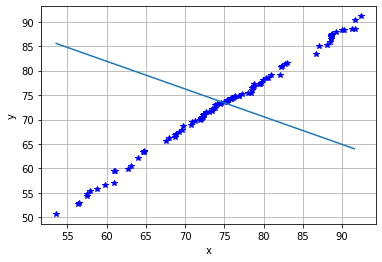

График уравнения средней квадратичной регрессии х на у


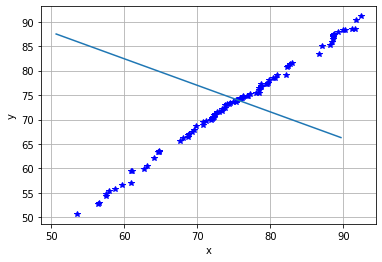

In [ ]:
Dx = 0
MOx = (sum(samplex)/novitr3)
for i in range(98):
    Dx = Dx + (samplex[i] - MOx)**2
Dx /= novitr3
l=round(e1[7]-d1[0])
dify = [0]*l
koordx = [0]*l
for i in range(l):
    koordx[i]=i+d1[0]
    dify[i] = (r*math.sqrt(Dy)*(koordx[i]-MOx))/math.sqrt(Dx)+MOy 
print("График уравнения средней квадратичной регрессии х на у")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
for i in range(98):
    plt.plot(samplex[i],sampley[i],'b*')
plt.plot(koordx,dify)
plt.show()

l2 = round(e[7]-d[0])
difx = [0]*l2
koordy = [0]*l2
for i in range(l2):
    koordy[i]=i+d[0]
    difx[i] = (r*math.sqrt(Dx)*(koordy[i]-MOy))/math.sqrt(Dy)+MOx 
print("График уравнения средней квадратичной регрессии х на у")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
for i in range(98):
    plt.plot(samplex[i],sampley[i],'b*')
plt.plot(koordy,difx)
plt.show()

Вывод: полученные прямые показывают основное направление корреляционной связи - отрицательное(убывающее). C ростом одной последовательности убывает другая.

## 8

In [ ]:
_xy = [0]*8
_yx = [0]*8
for i in range(8):
    _yx[i] = v[i]/nx[i]
for i in range(8):
    _xy[i] = u[i]/ny[i]
Sgenx = 0
Sgeny = 0
Sintgr_yx = 0
Sintgr_xy = 0
MOu = sum(x1)/8
MOv = sum(y1)/8
for i in range(8):
    Sgenx += (x1[0] - MOu)**2*nx[i]
Sgenx /= novitr3
Sgenx = math.sqrt(Sgenx)
for i in range(8):
    Sgeny += (y1[0] - MOv)**2*ny[i]
Sgeny /= novitr3
Sgeny = math.sqrt(Sgeny)
for i in range(8):
    Sintgr_yx += nx[i] * (_yx[i] - MOv)**2
Sintgr_yx /= novitr3
Sintgr_yx = math.sqrt(Sintgr_yx)
for i in range(8):
    Sintgr_xy += ny[i] * (_xy[i] - MOu)**2
Sintgr_xy /= novitr3
Sintgr_xy = math.sqrt(Sintgr_xy)
nyx = Sintgr_yx/Sgeny
nxy = Sintgr_xy/Sgenx
print("nyx =", round(nyx, 2))
print("nxy =",round(nxy, 2))

nyx = 0.55
nxy = 0.56


Вывод: условие $\eta\in[0,1]$ и неравенство $\eta\geq|r_{B}| $ выполняются, следовательно, вычисления верны. Корреляционные отношения примерно находятся по середине диапазона $\eta\in[0,1]$, что показывает о частичной связи признака Y с признаком X функциональной зависимостью и наоборот.

## 9

Берутся производные от $(c+bx+ax^{2}-y)^{2}$:
$ 2x^{2}(ax^{2}+bx+c-y)\\
2x(ax^{2}+bx+c-y)\\
2ax^{2} + 2bx + 2c - 2y $
Приравнниваются к нулю и составляем систему:

$\begin{cases}
 & nc+b\sum_{i=1}^{n}x_{i}+a\sum_{i=1}^{n}x_{i}^{2}=\sum_{i=1}^{n}y_{i}\\
 & c\sum_{i=1}^{n}x_{i}+b\sum_{i=1}^{n}x_{i}^{2}+\sum_{i=1}^{n}x_{i}^{3}=\sum_{i=1}^{n}y_{i}x_{i}\\
 & c\sum_{i=1}^{n}x_{i}^{2}+b\sum_{i=1}^{n}x_{i}^{3}+\sum_{i=1}^{n}x_{i}^{4}=\sum_{i=1}^{n}y_{i}x_{i}^{2}
\end{cases}$

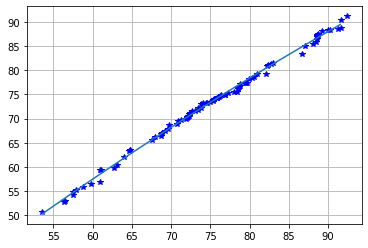

[-1.82193108e+01  1.42466527e+00 -2.72078639e-03]


In [ ]:
sumx=0
sumx2=0
sumx3=0
sumx4=0
sumy=0
sumxy=0
sumx2y=0
koordx2 = [0]*l
lefttoright = [0]*l
for i in range(98):
    sumx = sumx+samplex[i]
    sumx2 = sumx2+samplex[i]**2
    sumx3 = sumx3+samplex[i]**3
    sumx4 = sumx4+samplex[i]**4
    sumy = sumy+sampley[i]
    sumxy = sumxy+(samplex[i]*sampley[i])
    sumx2y=sumx2y+(samplex[i]**2*sampley[i])
left = np.array([[98,sumx,sumx2],[sumx,sumx2,sumx3],[sumx2,sumx3,sumx4]])
right = np.array([sumy,sumxy,sumx2y])
helplandr = np.linalg.inv(left).dot(right)
for i in range(98):
    plt.plot(samplex[i],sampley[i],'b*')
for i in range(l):
    koordx2[i]=i+d1[0]
    lefttoright[i]=helplandr[0]+helplandr[1]*(i+d1[0])+helplandr[2]*(i+d1[0])**2
plt.plot(koordx2,lefttoright)
plt.grid()
plt.show()
print(helplandr)

Вывод: уравнение параболической регрессии имеет вид: $y = -0.00272x^{2} + 1.425x - 18.22$. Данный график отображает средние значения на множестве выборки.

## 10

Производная по a: 

$2a + \frac{2b}{x} - 2y$

Производная по b:

$\frac{2(a+\frac{b}{x}-y)}{x}$

$\begin{cases}
 & na+b\sum{i=1}^{n}\frac{1}{x{i}}=\sum{i=1}^{n}y{i}\\
 & a\sum{i=1}^{n}\frac{1}{x{i}}+b\sum{i=1}^{n}\frac{1}{x{i}^{2}}=\sum{i=1}^{n}\frac{y{i}}{x_{i}^{2}}
\end{cases}$

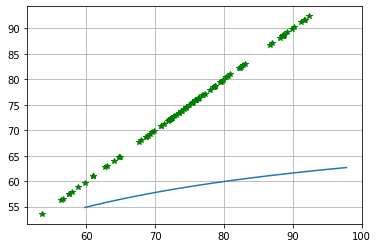

[   74.98948976 -1204.94776643]


In [ ]:
ox,ox2,raz=0,0,0
for i in range(8):
    ox+=1/samplex2[i]
    ox2+=1/samplex2[i]**2
    raz+=sampley[i]/samplex2[i]
left2=np.array([[novitr3,ox],[ox,ox2]])
right2=np.array([sum(sampley2),raz])
helplandr2=np.linalg.inv(left2).dot(right2)
for i in range(98):
    plt.plot(samplex2[i],samplex2[i],'g*')
koordx3,lefttoright2=[0]*l,[0]*l
for i in range(l):
    koordx3[i]=i+sampley2[0]
    lefttoright2[i]=helplandr2[0]+helplandr2[1]/(i+sampley2[0])
plt.plot(koordx3,lefttoright2)
plt.grid()
plt.show()
print(helplandr2)

Вывод: на графике изображена обратно пропорциональная функция: $y = 74.99+\frac{1204.95}{x}$

## 11

In [ ]:
gry, gry2, gry3, gry4=[0]*novitr3, [0]*novitr3, [0]*novitr3, [0]*novitr3
dstar, dstar2, dstar3, dstar4 = 0, 0, 0, 0
aprox, aprox2, aprox3, aprox4 = 0, 0, 0, 0
ostat, ostat2, ostat3, ostat4=[0]*novitr3, [0]*novitr3, [0]*novitr3, [0]*novitr3
for i in range(novitr3):
    gry[i]=(r*math.sqrt(Dy)*(samplex[i]-MOx))/math.sqrt(Dx)+MOy
    gry2[i]=(r*math.sqrt(Dx)*(sampley[i]-MOy))/math.sqrt(Dy)+MOx
    gry3[i]=helplandr[0]+helplandr[1]*samplex[i]+helplandr[2]*samplex[i]**2
    gry4[i]=helplandr2[0]+helplandr2[1]/samplex[i]
    dstar=dstar+((gry[i]-MOy)**2/novitr3)
    dstar2=dstar2+((gry2[i]-MOx)**2/novitr3)
    dstar3=dstar3+((gry3[i]-MOy)**2/novitr3)
    dstar4=dstar4+((gry4[i]-MOy)**2/novitr3)
    aprox=aprox+(abs((sampley[i]-gry[i])/sampley[i])/novitr3)
    aprox2=aprox2+(abs((sampley[i]-gry2[i])/samplex[i])/novitr3)
    aprox3=aprox3+(abs((sampley[i]-gry3[i])/sampley[i])/novitr3)
    aprox4=aprox4+(abs((sampley[i]-gry4[i])/sampley[i])/novitr3)
    ostat[i]=(sampley[i]-gry[i])**2
    ostat2[i]=(samplex[i]-gry2[i])**2
    ostat3[i]=(sampley[i]-gry3[i])**2
    ostat4[i]=(sampley[i]-gry4[i])**2
    
table5 = PrettyTable([" ","R^2","Se","A"])
table5.add_row([1,round(dstar/Dy,5),round(np.sqrt(sum(ostat)/(novitr3-2)),5),round(aprox*100,5)])    
table5.add_row([2,round(dstar2/Dx,5),round(np.sqrt(sum(ostat2)/(novitr3-2)),5),round(aprox2*100,5)])  
table5.add_row([3,round(dstar3/Dy,5),round(np.sqrt(sum(ostat3)/(novitr3-3)),5),round(aprox3*100,5)]) 
table5.add_row([4,round(Dy/dstar4,5),round(np.sqrt(sum(ostat4)/(novitr3-2)),5),round(aprox4*100,5)]) 
print(table5)

+---+---------+----------+----------+
|   |   R^2   |    Se    |    A     |
+---+---------+----------+----------+
| 1 | 0.30828 | 15.0245  | 16.46819 |
| 2 | 0.30828 | 14.70788 | 16.01494 |
| 3 | 0.99686 | 0.54401  | 0.57824  |
| 4 | 0.42058 | 16.5521  | 18.9771  |
+---+---------+----------+----------+


Вывод: Коэффициенту детерминации для 1 и 2 - слабая, для 3 - весьма высокая, а для 4 - умеренная сила связи.

Средняя квадратическая ошибка демонстрирует среднеквадратическое отклонение наблюдаемых значений от теоритических. Нас устраивает, что ско > Se.

Ошибка аппроксимации у всех моделей, кроме третьей, больше 7%, что показывает плохое качество модели.

## Вывод:
Были решены все задания, которые предоставлены. Изучена корреляционная зависимость между случайными веречинами, найден доверительный интервал, была проверка статистической гипотезы на их справедливость. Изучен метод наименьших квадратов, статистические свойства МНК оценок, функции регрессии и роли МНК в регрессионном анализе. Был найден коэффициент детерминации, средняя квадратическая ошибка и средняя ошибка апроксимации для 4-ёх моделей.